In [34]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:

# Step 2: Load the dataset
df = pd.read_csv("Data.csv")  # Place this file in same directory as this notebook


In [37]:

# Step 3: Replace '?' with NaN and drop unwanted columns
df.replace('?', np.nan, inplace=True)
df.drop(columns=['fnlwgt', 'educational-num'], inplace=True)

In [38]:

# Step 4: Fill missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\MukundKumarGupta\AppData\Local\Temp\ipykernel_24360\251912992.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [39]:
# Feature Engineering
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df['capital-gain'] = df['capital-gain'].astype(int).apply(lambda x: np.log1p(x))
df['capital-loss'] = df['capital-loss'].astype(int).apply(lambda x: np.log1p(x))
df['age'] = np.where(df['age'] > 75, 75, df['age'])
df['hours-per-week'] = np.where(df['hours-per-week'] > 80, 80, df['hours-per-week'])


In [40]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,8.947546,0.0,40,United-States,1
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0.000000,0.0,30,United-States,0


In [42]:

# Split features/target
X = df.drop('income', axis=1)
y = df['income']

In [43]:

# Identify columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [47]:

# Classifier dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [46]:
# Check imbalance
print(100*(y.value_counts(normalize=True)))

income
0    76.071823
1    23.928177
Name: proportion, dtype: float64


Clearly data is highly imbalanced

In [21]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Fit and transform training data for SMOTE
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [55]:
pd.Series(y_train).value_counts()

income
0    29676
1     9397
Name: count, dtype: int64

In [50]:

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


After SMOTE: income
0    29676
1    29676
Name: count, dtype: int64


In [59]:
# Train and evaluate
results = {}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_encoded)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results[name] = acc



Logistic Regression
Accuracy: 0.8087828846350701
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      7479
           1       0.56      0.84      0.67      2290

    accuracy                           0.81      9769
   macro avg       0.75      0.82      0.77      9769
weighted avg       0.85      0.81      0.82      9769


Decision Tree
Accuracy: 0.8183027945542021
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.60      0.65      0.63      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.76      0.75      9769
weighted avg       0.82      0.82      0.82      9769


Random Forest
Accuracy: 0.8440986794963661
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7479
           1       0.66    

C:\Users\MukundKumarGupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [08:19:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8566895280990889
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      7479
           1       0.66      0.81      0.73      2290

    accuracy                           0.86      9769
   macro avg       0.80      0.84      0.81      9769
weighted avg       0.87      0.86      0.86      9769



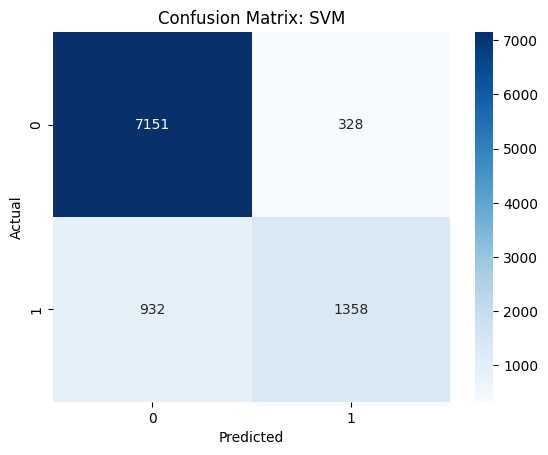

In [ ]:

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [24]:

# Best model
best_model = max(results, key=results.get)
print(f"\n✅ Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")


✅ Best Model: XGBoost with Accuracy: 0.8777


StreamlitApp Building

In [28]:
import joblib
from xgboost import XGBClassifier

# Final model pipeline using best model 
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Fit on full training data
final_model.fit(X_train, y_train)

# Save pipeline to disk
joblib.dump(final_model, "best_model.pkl")
print("✅ Model saved as best_model.pkl")

✅ Model saved as best_model.pkl


C:\Users\MukundKumarGupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [03:35:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
